In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
prc = pd.read_csv(r"C:\Users\User\Desktop\Files for Applicant\Barley_price.csv")
prdc = pd.read_csv(r"C:\Users\User\Desktop\Files for Applicant\Barley_production.csv")

In [145]:
prdc.drop(["State ANSI", "Ag District", "Ag District Code"], axis = 1, inplace = True)

In [146]:

prc.drop(["State ANSI"], axis = 1, inplace = True)


In [147]:
def drop_const_column(df):
    dropable = []
    for clm in df.columns:
        if len(df[clm].unique()) == 1:
            dropable.append(clm)
    df.drop(dropable, axis = 1, inplace=True)


def object_to_numeric(df, col):
    df[col] = df[col].map(lambda x: x.replace(",", ""))
    df[col] = pd.to_numeric(df[col])




In [148]:
drop_const_column(prdc)
drop_const_column(prc)
object_to_numeric(prdc, 'Value')


In [149]:
prdc.head()

,Year,State,Value
0,2017,ARIZONA,2227000
1,2017,CALIFORNIA,470000
2,2017,CALIFORNIA,270000
3,2017,CALIFORNIA,43000
4,2017,CALIFORNIA,227000


In [150]:
prdc.head()

,Year,State,Value
0,2017,ARIZONA,2227000
1,2017,CALIFORNIA,470000
2,2017,CALIFORNIA,270000
3,2017,CALIFORNIA,43000
4,2017,CALIFORNIA,227000


In [151]:
prc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    718 non-null    int64  
 1   State   718 non-null    object 
 2   Value   718 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.0+ KB


In [152]:
prc_wigted_avg = []

years = prdc['Year'].unique()
states = prdc['State'].unique()

for year in years:
    anual_prdc_df = prdc[prdc['Year'] == year]
    anual_price_df = prc[prc['Year']== year]

    anual_prdc = anual_prdc_df['Value'].sum()
    anual_total_revenue = 0

    for state in states:
        price_statewise =  anual_price_df[anual_price_df['State']== state]
        #print('kkkkkkkkkkkk', type(price_statewise))
        #print(price_statewise)
        price_statewise=float(price_statewise['Value'].sum())

        #print(year, state, 'price_statewise',price_statewise)
        prdc_statewise = float(anual_prdc_df[anual_prdc_df['State']== state]['Value'].sum())
        #print(year, state, 'prdc_statewise',prdc_statewise)
        revenue_statewise= prdc_statewise * price_statewise
        #print(year, state, 'revenue_statewise',revenue_statewise)
        anual_total_revenue = anual_total_revenue + revenue_statewise
        #print(year, state, 'anual_total_revenue',anual_total_revenue)
    prc_wigted_avg.append(anual_total_revenue/anual_prdc)





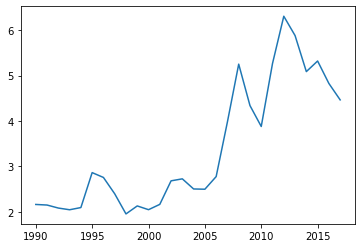

In [153]:
sns.lineplot(x= years, y=prc_wigted_avg )
plt.show()